Design and implement a CNN for Image Classification a) Select a suitable image
classification dataset (medical imaging, agricultural, etc.). b) Optimized with different
hyper-parameters including learning rate, filter size, no. of layers, optimizers, dropouts,
etc.

Epoch 1/10


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 - 12s - 6ms/step - accuracy: 0.7782 - loss: 0.6166 - val_accuracy: 0.8487 - val_loss: 0.4159
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8538 - loss: 0.4101 - val_accuracy: 0.8746 - val_loss: 0.3463
Epoch 3/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8726 - loss: 0.3555 - val_accuracy: 0.8874 - val_loss: 0.3190
Epoch 4/10
1875/1875 - 12s - 6ms/step - accuracy: 0.8852 - loss: 0.3221 - val_accuracy: 0.8928 - val_loss: 0.2984
Epoch 5/10
1875/1875 - 12s - 7ms/step - accuracy: 0.8940 - loss: 0.2964 - val_accuracy: 0.8964 - val_loss: 0.2815
Epoch 6/10
1875/1875 - 13s - 7ms/step - accuracy: 0.8993 - loss: 0.2756 - val_accuracy: 0.9001 - val_loss: 0.2727
Epoch 7/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9054 - loss: 0.2601 - val_accuracy: 0.9063 - val_loss: 0.2567
Epoch 8/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9092 - loss: 0.2473 - val_accuracy: 0.9015 - val_loss: 0.2619
Epoch 9/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9147 - loss: 0.2323 - val_accuracy: 0.9058 - va

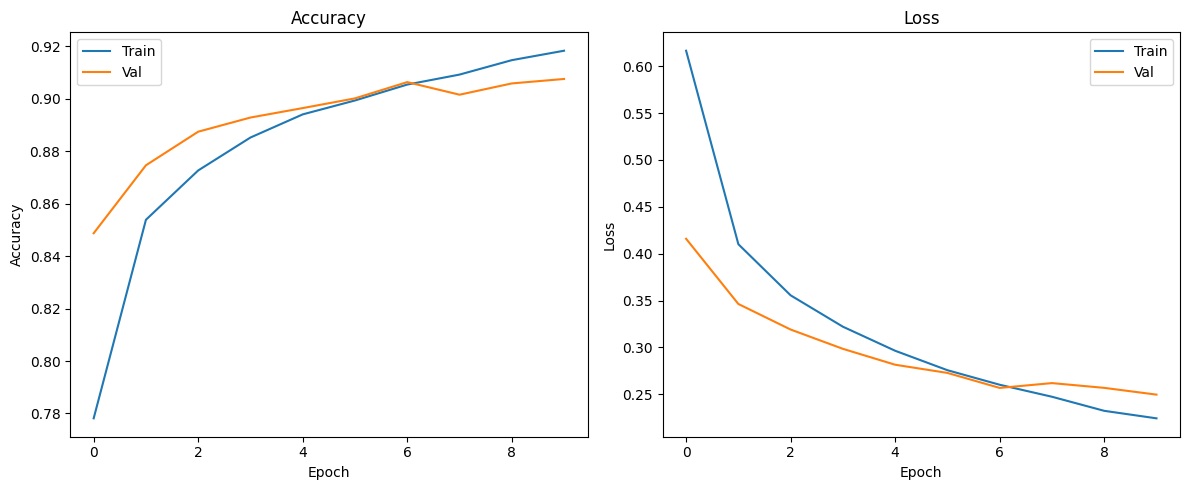

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

def build_model(filters=[32, 64, 128], kernel_size=3, dropout_rate=0.3, lr=0.001, opt='adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(filters[0], kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D())
    for f in filters[1:]:
        model.add(layers.Conv2D(f, kernel_size, activation='relu'))
        model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = getattr(optimizers, opt.capitalize())(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameters
filters = [32, 64]        # Try [32, 64, 128] or [64, 128]
dropout = 0.5             # Try 0.2, 0.3, 0.5
learning_rate = 0.0005    # Try 0.01, 0.001, 0.0005
optimizer_name = 'adam'   # Try 'adam', 'sgd', 'rmsprop'

model = build_model(filters=filters, dropout_rate=dropout, lr=learning_rate, opt=optimizer_name)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Evaluate
print(f"\n✅ Final Test Accuracy: {model.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, np.argmax(model.predict(x_test), axis=1)))

# Plot
plt.figure(figsize=(12, 5))
for i, key in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i+1)
    plt.plot(history.history[key], label='Train')
    plt.plot(history.history['val_' + key], label='Val')
    plt.title(key.capitalize())
    plt.xlabel('Epoch')
    plt.ylabel(key.capitalize())
    plt.legend()
plt.tight_layout(); plt.show()
